<a href="https://colab.research.google.com/github/Fakhre-Alam-Hub/MNIST-data-analysis-and-model/blob/main/Fashion_mnist_classification_with_Neural_Networks_in_TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Introduction to Classification with Neural Networks in TensorFlow Tutorial </center>

The following are some standard values often use in classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

classification evaluation methods

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

In [28]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [29]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

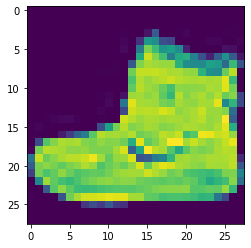

In [4]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(X_train[0]);

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

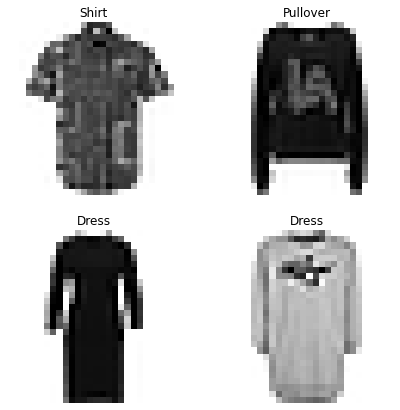

In [6]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Let's create first basic architecture for neural network

**Note**
* For integer labels use [tf.keras.losses.SparseCategoricalCrossentropy()](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) loss ,
* For one-hot encoded labels use [tf.keras.losses.CategoricalCrossentropy()](tf.keras.losses.SparseCategoricalCrossentropy()) loss.

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

1875/1875 [==============================] - 7s 2ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy: 0.3324
Epo

In [37]:
# Check the min and max values of the training data
X_train.min(), X_train.max()

(0, 255)

Scaling the data

In [38]:
# Divide train and test images by the maximum value (normalize it)
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Check the min and max values of the training data
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

We'll use the same model as before (model) except this time the data will be normalized.

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_norm = model.fit(X_train_norm, y_train, epochs=10, validation_data = (X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Woah, we used the exact same model as before, but with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

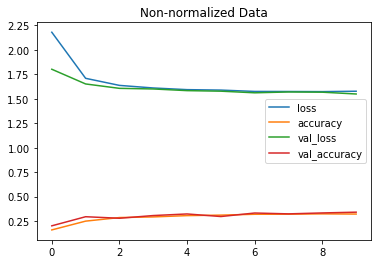

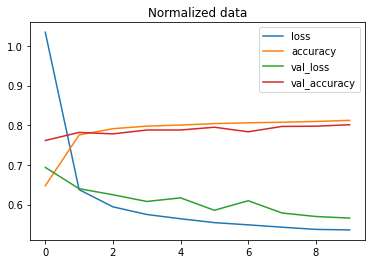

In [11]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(history_norm.history).plot(title="Normalized data");

Wow. From these two plots, we can see how much quicker our model with the normalized data (model) improved than the model with the non-normalized data (model).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history_norm = model.fit(X_train_norm, y_train, epochs=10, validation_data = (X_test_norm, y_test), verbose=0, callbacks=[lr_scheduler])

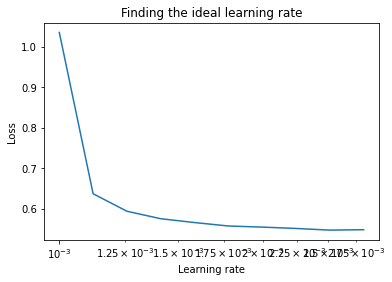

In [14]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(10)/20))
plt.semilogx(lrs, find_lr_history_norm.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to (0.00125) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(lr=0.0012),
                 metrics=["accuracy"])


# Fit the model
history_norm = model.fit(X_train_norm, y_train, epochs=5, validation_data = (X_test_norm, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1320 - accuracy: 0.6332 - val_loss: 0.8248 - val_accuracy: 0.7313
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7319 - accuracy: 0.7498 - val_loss: 0.7204 - val_accuracy: 0.7524
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6683 - accuracy: 0.7669 - val_loss: 0.6953 - val_accuracy: 0.7626
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6412 - accuracy: 0.7736 - val_loss: 0.6675 - val_accuracy: 0.7673
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6246 - accuracy: 0.7788 - val_loss: 0.6669 - val_accuracy: 0.7655


In [16]:
# Make predictions with the most recent model
y_probs = model.predict(X_test_norm) # "probs" is short for probabilities

y_probs[0]

array([7.2891173e-09, 2.5808997e-28, 5.2757645e-08, 1.6531449e-06,
       1.7558020e-10, 3.9346641e-01, 1.7788775e-08, 9.1412030e-02,
       8.4194115e-05, 5.1503563e-01], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [17]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

y_preds[0]

9

Wonderful, now we've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

## Understanding Confusion Matrix

**True Positive (TP):** The actual value was positive and the model predicted a positive value

**True Negative (TN):** The actual value was negative and the model predicted a negative value

**False Positive (FP) – Type 1 error:** The actual value was negative but the model predicted a positive value

**False Negative (FN) – Type 2 error:** The actual value was positive but the model predicted a negative value


**<center> Precision vs. Recall </center>**
Precision: Precision tells us how many of the correctly predicted cases actually turned out to be positive (use when FP is higher concern than FN) e.x - recommendation.

Recall: Recall tells us how many of the actual positive cases we were able to predict correctly with our model (use when FN is higher concern than FP) e.x - medical.

**F1-score:** F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

In [18]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_preds, y_test)

In [23]:
cm

array([[709,   1,  14,  26,   0,   1, 133,   0,   0,   1],
       [ 26, 952,   5,  25,   1,   0,  14,   0,   1,   0],
       [ 33,   3, 572,  14,  56,   1, 142,   0,   8,   1],
       [ 88,  26,  10, 797,  21,  22,  60,   1,  16,   0],
       [ 38,   9, 295,  55, 863,   0, 432,   0,  41,   0],
       [  3,   1,   4,   8,   0, 850,   5,  32,  21,  57],
       [ 91,   8,  93,  40,  33,   2, 199,   0,   6,   1],
       [  0,   0,   0,   4,   0,  73,   0, 932,   4,  62],
       [ 12,   0,   7,  31,  26,  13,  15,   2, 903,   0],
       [  0,   0,   0,   0,   0,  38,   0,  33,   0, 878]])

Text(69.0, 0.5, 'Predicted value')

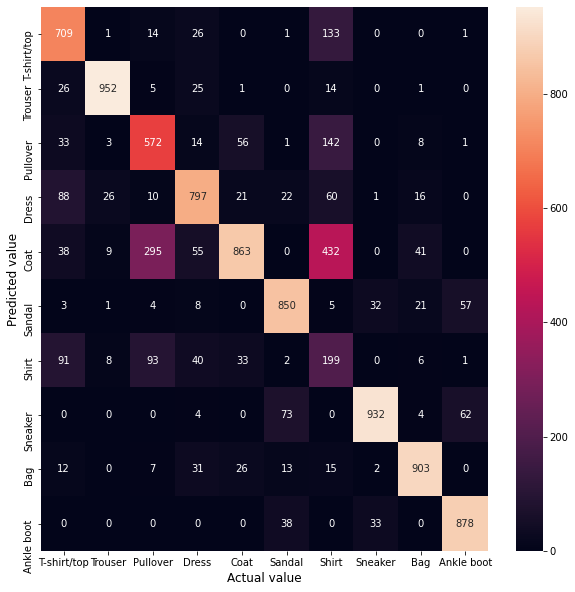

In [27]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names,fmt='.3g')
plt.xlabel('Actual value', fontsize=12)
plt.ylabel('Predicted value', fontsize=12)

In [ ]:
# Classification Report
classification_report(y_test, y_preds)

Using fully connected layer directly for our image classification we convert the 2d image into vector of pixel values 28x28(flatten the input image), therfore all the spatial information is lost. and there are many parameters for this architecture.

To counter this we use **Convolution Neural Network** for image classification.
Spatial structure is super important in image classification.
Connect patch in input layer to a single neuron in subsequent layer. Use a sliding window to define connections. We weight the patch to detect the particular fetures.

# Convolution Neural Network

[CNN Resource](https://blog.xrds.acm.org/2016/06/convolutional-neural-networks-cnns-illustrated-explanation/#:~:text=The%20architecture%20of%20a%20typical%20CNN%20is%20composed,are%20commonly%20observed%20in%20complex%20neural%20network%20architectures%3A)

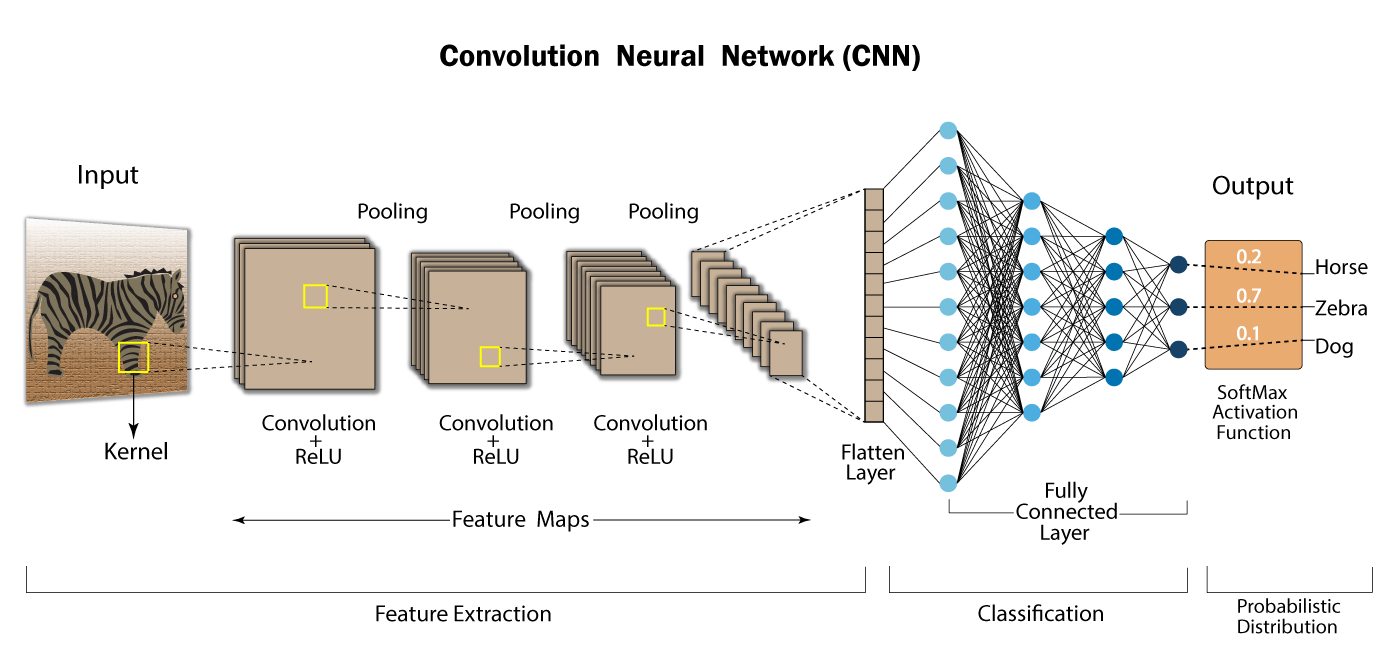

Let's make CNN architecture

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create the model
cnn_model = tf.keras.Sequential([
  # CNN layer 1
  tf.keras.layers.Reshape(target_shape=(28,28,1), input_shape=(28,28)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),

  # CNN layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),

  # Fully connected layer
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model
cnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Fit the model
cnn_history = cnn_model.fit(X_train_norm, y_train, epochs=10, validation_data = (X_test_norm, y_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 33s 3ms/step - loss: 0.4706 - accuracy: 0.8300 - val_loss: 0.3614 - val_accuracy: 0.8700
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3179 - accuracy: 0.8850 - val_loss: 0.3603 - val_accuracy: 0.8710
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2717 - accuracy: 0.8992 - val_loss: 0.2949 - val_accuracy: 0.8929
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2396 - accuracy: 0.9114 - val_loss: 0.2697 - val_accuracy: 0.9037
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2158 - accuracy: 0.9203 - val_loss: 0.2816 - val_accuracy: 0.8952
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1949 - accuracy: 0.9274 - val_loss: 0.2939 - val_accuracy: 0.8890
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1777 - accuracy: 0.9335 - val_loss: 0.2665 - val_accuracy

Wow!... Look that accuracy how much improved as compared to ANN model.

Let's check the evaluation metrics.

In [49]:
cnn_y_probs = cnn_model.predict(X_test_norm)
cnn_y_probs[0]

array([1.9902839e-07, 2.4988180e-08, 1.2504603e-11, 2.1250283e-11,
       2.7828725e-12, 2.2259896e-07, 8.5084214e-12, 2.3456470e-05,
       8.2990139e-09, 9.9997604e-01], dtype=float32)

In [50]:
cnn_y_preds = cnn_y_probs.argmax(axis=1)
cnn_y_preds[0]

9

In [51]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cnn_cm = confusion_matrix(cnn_y_preds, y_test)

In [53]:
cnn_cm

array([[875,   2,  27,   9,   0,   1, 117,   0,   2,   0],
       [  1, 981,   0,   3,   0,   0,   0,   0,   0,   0],
       [ 11,   0, 771,   5,  20,   0,  45,   0,   3,   0],
       [ 27,   9,  13, 932,  28,   0,  40,   0,   6,   0],
       [  6,   5, 101,  33, 909,   0,  74,   0,   6,   0],
       [  1,   0,   0,   0,   0, 988,   0,  11,   4,   6],
       [ 74,   1,  87,  18,  43,   0, 714,   0,   2,   0],
       [  0,   0,   0,   0,   0,   7,   0, 971,   2,  30],
       [  5,   2,   1,   0,   0,   0,  10,   0, 975,   0],
       [  0,   0,   0,   0,   0,   4,   0,  18,   0, 964]])

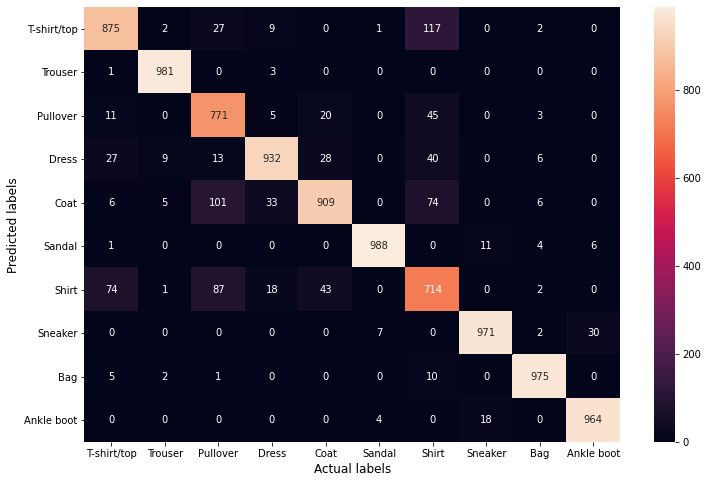

In [57]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cnn_cm, annot=True, xticklabels=class_names, yticklabels=class_names,fmt='.3g')
plt.xlabel('Actual labels', fontsize=12)
plt.ylabel('Predicted labels', fontsize=12)
plt.show()

In [63]:
print(classification_report(y_test, cnn_y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.90      0.77      0.83      1000
           3       0.88      0.93      0.91      1000
           4       0.80      0.91      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.71      0.74      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Check the prediction value on random image from test data

In [106]:
# Function to plot multiple random images and check the prediction value
import random

def plot_random_image(model, X_test, y_test, classes):
  plt.figure(figsize=(18, 8))
  for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    rand_index = random.choice(range(len(X_test)))
    target_image = X_test[rand_index]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[y_test[rand_index]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_label), color=color)


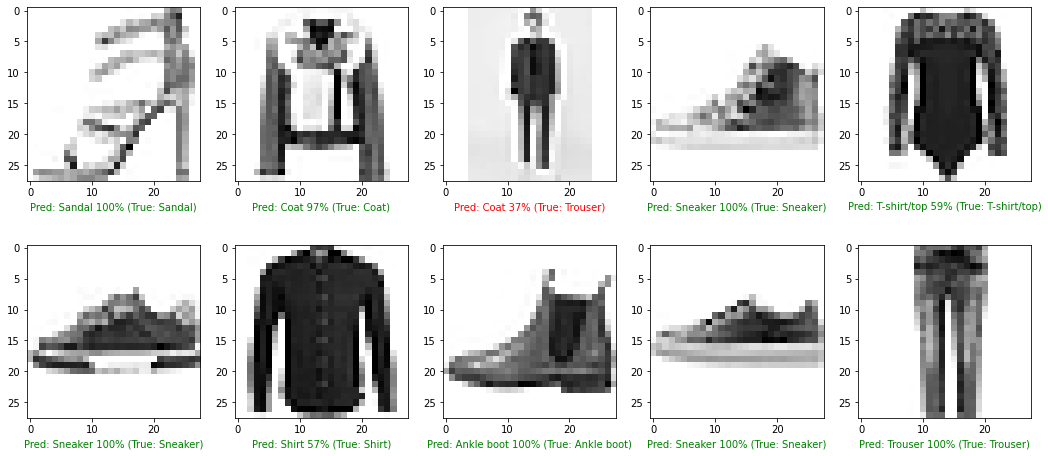

In [107]:
# Check out a random image as well as its prediction
plot_random_image(model=cnn_model,
                  X_test=X_test_norm,
                  y_test=y_test,
                  classes=class_names)